# <b><span style='color:#F1A424'>AutoML - Multi-Class Classification - Iris Flower Type Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    


The Iris dataset is a classic dataset in the field of machine learning and statistics.It contains measurements of various features of iris flowers, making it a quintessential dataset for practicing classification algorithms and statistical analysis.

Here are some key details about the Iris dataset:

**Features**:

- `Sepal Length (cm)`: Measurement of the length of the outermost petal parts (sepals).
- `Sepal Width (cm)`: Measurement of the width of the sepals.
- `Petal Length (cm)`: Measurement of the length of the innermost petal parts (petals).
- `Petal Width (cm)`: Measurement of the width of the petals.

**Target Variable**:

- `Species`: The species of iris flowers. It includes three classes: `Setosa`, `Versicolor` and `Virginica`.

        
**Objective**:

The primary objective is typically to build a model that can accurately classify iris flowers into one of the three species based on the provided features.

**Challenges**:

- The dataset consists of 150 instances, with 50 instances for each of the three classes.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("teradataml", "iris_input")

In [5]:
# Fetching in teradata dataframe
iris = DataFrame.from_table("iris_input")

In [6]:
# first 5 rows
iris.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [7]:
# iris dataset
iris.shape

(150, 6)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
iris_sample = iris.sample(frac = [0.8, 0.2])

In [9]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,1
5,5.0,3.6,1.4,0.2,1,1
6,5.4,3.9,1.7,0.4,1,2
7,4.6,3.4,1.4,0.3,1,2
9,4.4,2.9,1.4,0.2,1,1
10,4.9,3.1,1.5,0.1,1,1
8,5.0,3.4,1.5,0.2,1,1
4,4.6,3.1,1.5,0.2,1,1
2,4.9,3.0,1.4,0.2,1,2
1,5.1,3.5,1.4,0.2,1,1


In [10]:
# Fetching train and test data
iris_train= iris_sample[iris_sample['sampleid'] == 1].drop('sampleid', axis=1)
iris_test = iris_sample[iris_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
iris_train.shape

(120, 6)

In [12]:
# test data shape
iris_test.shape

(30, 6)

In [13]:
#train dataset
iris_train.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
4,4.6,3.1,1.5,0.2,1
8,5.0,3.4,1.5,0.2,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
15,5.8,4.0,1.2,0.2,1
16,5.7,4.4,1.5,0.4,1
13,4.8,3.0,1.4,0.1,1
5,5.0,3.6,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
1,5.1,3.5,1.4,0.2,1


In [14]:
# test dataset
iris_test.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
7,4.6,3.4,1.4,0.3,1
12,4.8,3.4,1.6,0.2,1
14,4.3,3.0,1.1,0.1,1
23,4.6,3.6,1.0,0.2,1
36,5.0,3.2,1.2,0.2,1
37,5.5,3.5,1.3,0.2,1
26,5.0,3.0,1.6,0.2,1
11,5.4,3.7,1.5,0.2,1
6,5.4,3.9,1.7,0.4,1
2,4.9,3.0,1.4,0.2,1


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Using only 'xgboost' for model training
# Keeping early stopping timer threshold to 100 sec and max_models 5
# and verbose level 2 for detailed loggging

aml = AutoClassifier(include=['xgboost'],
                     verbose=2,
                     max_runtime_secs=100,
                     max_models=5)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 120
Total Columns in the data: 6

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
species,INTEGER,120,0,None,0,120,0,0.0,100.0
petal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
id,INTEGER,120,0,None,0,120,0,0.0,100.0
sepal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
sepal_length,FLOAT,120,0,None,0,120,0,0.0,100.0


            id  sepal_length  sepal_width  petal_length  petal_width  species
func                                                                         
min      1.000         4.400        2.200         1.200        0.100    1.000
std     43.485         0.827        0.442         1.766        0.764    0.827
25%     40.750         5.200        2.800         1.600        0.400    1.000
50%     82.500         5.900        3.000         4.500        1.400    2.000
75%    118.250         6.425        3.400         5.225        1.900    3.000
max    149.000         7.900        4.400         6.900        2.500    3.000
mean    79.092         5.930        3.070         3.910        1.259    2.067
count  120.000       120.000      120.000       120.000      120.000  120.000

Statistics of Data:


func,id,sepal_length,sepal_width,petal_length,petal_width,species
std,43.485,0.827,0.442,1.766,0.764,0.827
25%,40.75,5.2,2.8,1.6,0.4,1
50%,82.5,5.9,3,4.5,1.4,2
75%,118.25,6.425,3.4,5.225,1.9,3
max,149,7.9,4.4,6.9,2.5,3
min,1,4.4,2.2,1.2,0.1,1
mean,79.092,5.93,3.07,3.91,1.259,2.067
count,120,120,120,120,120,120



Target Column Distribution:


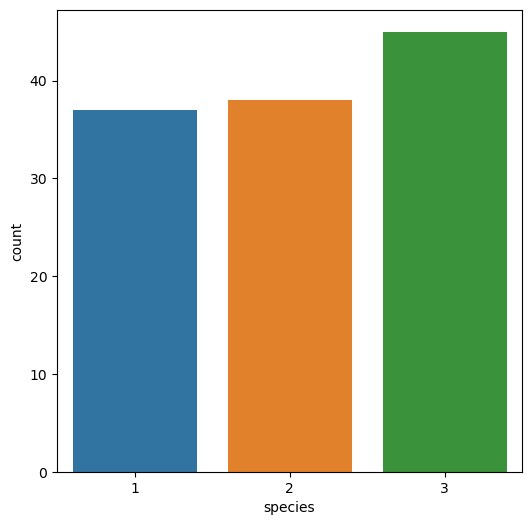

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           0.833333


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           0.833333


['sepal_width']


sepal_length,sepal_width,petal_length,petal_width,species,id
5.4,3.9,1.3,0.4,1,17
7.3,2.9,6.3,1.8,3,55
7.0,3.2,4.7,1.4,2,47
7.4,2.8,6.1,1.9,3,16
7.2,3.6,6.1,2.5,3,34
7.2,3.0,5.8,1.6,3,120
6.7,3.1,4.4,1.4,2,52
6.7,3.3,5.7,2.5,3,144
4.5,2.3,1.3,0.3,1,126
6.1,2.8,4.7,1.2,2,43


['sepal_length', 'sepal_width', 'petal_width', 'petal_length']


['sepal_length', 'sepal_width', 'petal_width', 'petal_length']


species,id,sepal_length,sepal_width,petal_width,petal_length
1,10,0.1999999999999998,0.5999999999999999,0.04166666666666667,0.052631578947368425
2,12,0.3714285714285714,0.19999999999999996,0.375,0.40350877192982454
2,13,0.1999999999999998,0.1499999999999999,0.4166666666666667,0.3157894736842105
3,14,0.6571428571428571,0.44999999999999996,0.9583333333333333,0.7719298245614034
3,16,0.8571428571428571,0.2999999999999998,0.75,0.8596491228070174
1,17,0.2857142857142857,0.8499999999999999,0.12500000000000003,0.017543859649122823
3,15,0.457142857142857,0.3999999999999999,0.7083333333333334,0.631578947368421
3,11,0.34285714285714264,0.2999999999999998,0.7916666666666666,0.6491228070175439
3,9,0.5428571428571427,0.5499999999999998,1.0,0.8421052631578947
2,8,0.39999999999999986,0.19999999999999996,0.4583333333333333,0.49122807017543857


['petal_length', 'petal_width']


['r_petal_length', 'r_petal_width']


species,id,r_petal_length,r_petal_width
1,10,0.052631578947368425,0.04166666666666667
2,12,0.40350877192982454,0.375
2,13,0.3157894736842105,0.4166666666666667
3,14,0.7719298245614034,0.9583333333333333
3,16,0.8596491228070174,0.75
1,17,0.017543859649122823,0.12500000000000003
3,15,0.631578947368421,0.7083333333333334
3,11,0.6491228070175439,0.7916666666666666
3,9,0.8421052631578947,1.0
2,8,0.49122807017543857,0.4583333333333333


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


species,id,sepal_length,sepal_width,petal_length,petal_width
1,17,0.2857142857142857,0.8499999999999999,0.017543859649122823,0.12500000000000003
3,34,0.7999999999999999,0.7,0.8596491228070174,1.0
3,120,0.7999999999999999,0.3999999999999999,0.8070175438596491,0.625
1,126,0.02857142857142847,0.04999999999999982,0.017543859649122823,0.08333333333333333
3,70,0.5428571428571427,0.2999999999999998,0.6842105263157894,0.5833333333333334
2,52,0.6571428571428571,0.44999999999999996,0.5614035087719298,0.5416666666666666
3,144,0.6571428571428571,0.5499999999999998,0.7894736842105263,1.0
2,43,0.4857142857142855,0.2999999999999998,0.6140350877192983,0.4583333333333333
2,84,0.4857142857142855,0.3999999999999999,0.5964912280701753,0.5416666666666666
3,55,0.8285714285714284,0.34999999999999987,0.894736842105263,0.7083333333333334


['col_0', 'col_1']


response_column : species                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 768
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,lasso,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
1,2,XGBOOST_2,rfe,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
2,3,XGBOOST_3,rfe,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
3,4,XGBOOST_5,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
4,5,XGBOOST_4,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881


In [16]:
# Fitting train data
aml.fit(iris_train, iris_train.species)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,lasso,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
1,2,XGBOOST_2,rfe,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
2,3,XGBOOST_3,rfe,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
3,4,XGBOOST_5,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881
4,5,XGBOOST_4,pca,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,lasso,0.916667,0.916667,0.916667,0.916667,0.939394,0.916667,0.919048,0.931818,0.916667,0.914881


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=2)

{'response_column': 'species',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.1,
 'max_depth': 7,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '3', '2'],
 'max_models': 2}

In [20]:
aml.model_hyperparameters(rank=4)

{'response_column': 'species',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.1,
 'lambda1': 0.1,
 'shrinkage_factor': 0.5,
 'max_depth': 7,
 'min_node_size': 2,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '3', '2'],
 'max_models': 2}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(iris_test)

Data Transformation started ...


sepal_length,sepal_width,petal_length,petal_width,species
5.9,3.0,5.1,1.8,3
6.9,3.1,4.9,1.5,2
5.6,2.5,3.9,1.1,2
5.7,2.5,5.0,2.0,3
6.6,3.0,4.4,1.4,2
5.0,3.0,1.6,0.2,1
5.0,2.0,3.5,1.0,2
5.0,3.2,1.2,0.2,1
6.7,3.0,5.0,1.7,2
5.7,2.9,4.2,1.3,2


sepal_width,sepal_length,petal_width,id,petal_length,species
3.7,5.4,0.2,9,1.5,1
3.0,5.9,1.8,10,5.1,3
3.4,4.6,0.3,18,1.4,1
3.1,6.9,1.5,11,4.9,2
3.0,6.5,1.8,13,5.5,3
3.2,4.6,0.2,21,1.4,1
2.0,5.0,1.0,14,3.5,2
3.2,5.0,0.2,22,1.2,1
3.0,6.7,1.7,15,5.0,2
2.9,5.7,1.3,23,4.2,2


id,sepal_length,sepal_width,petal_width,petal_length,species
18,4.6,3.4,0.3,1.4,1
35,4.3,3.0,0.1,1.1,1
39,4.6,3.6,0.2,1.0,1
26,5.5,3.5,0.2,1.3,1
36,4.8,3.0,0.3,1.4,1
24,4.4,3.2,0.2,1.3,1
13,6.5,3.0,1.8,5.5,3
12,5.7,2.5,2.0,5.0,3
27,6.9,3.1,2.1,5.4,3
38,5.8,2.8,2.4,5.1,3


species,id,sepal_length,sepal_width,petal_width,petal_length
1,18,0.05714285714285694,0.5999999999999999,0.08333333333333333,0.035087719298245605
1,35,-0.028571428571428723,0.3999999999999999,0.0,-0.017543859649122782
1,39,0.05714285714285694,0.7,0.04166666666666667,-0.035087719298245605
1,26,0.31428571428571417,0.6499999999999999,0.04166666666666667,0.017543859649122823
1,36,0.11428571428571413,0.3999999999999999,0.08333333333333333,0.035087719298245605
1,24,0.0,0.5,0.04166666666666667,0.017543859649122823
3,13,0.5999999999999999,0.3999999999999999,0.7083333333333334,0.7543859649122806
3,12,0.3714285714285714,0.1499999999999999,0.7916666666666666,0.6666666666666666
3,27,0.7142857142857143,0.44999999999999996,0.8333333333333334,0.7368421052631579
3,38,0.39999999999999986,0.2999999999999998,0.9583333333333333,0.6842105263157894


id,petal_length,petal_width,species
18,1.4,0.3,1
35,1.1,0.1,1
39,1.0,0.2,1
26,1.3,0.2,1
36,1.4,0.3,1
24,1.3,0.2,1
13,5.5,1.8,3
12,5.0,2.0,3
27,5.4,2.1,3
38,5.1,2.4,3


species,id,r_petal_length,r_petal_width
1,18,0.035087719298245605,0.08333333333333333
1,35,-0.017543859649122782,0.0
1,39,-0.035087719298245605,0.04166666666666667
1,26,0.017543859649122823,0.04166666666666667
1,36,0.035087719298245605,0.08333333333333333
1,24,0.017543859649122823,0.04166666666666667
3,13,0.7543859649122806,0.7083333333333334
3,12,0.6666666666666666,0.7916666666666666
3,27,0.7368421052631579,0.8333333333333334
3,38,0.6842105263157894,0.9583333333333333


species,id,sepal_length,sepal_width,petal_length,petal_width
1,18,0.05714285714285694,0.5999999999999999,0.035087719298245605,0.08333333333333333
1,35,-0.028571428571428723,0.3999999999999999,-0.017543859649122782,0.0
1,39,0.05714285714285694,0.7,-0.035087719298245605,0.04166666666666667
1,26,0.31428571428571417,0.6499999999999999,0.017543859649122823,0.04166666666666667
1,36,0.11428571428571413,0.3999999999999999,0.035087719298245605,0.08333333333333333
1,24,0.0,0.5,0.017543859649122823,0.04166666666666667
3,13,0.5999999999999999,0.3999999999999999,0.7543859649122806,0.7083333333333334
3,12,0.3714285714285714,0.1499999999999999,0.6666666666666666,0.7916666666666666
3,27,0.7142857142857143,0.44999999999999996,0.7368421052631579,0.8333333333333334
3,38,0.39999999999999986,0.2999999999999998,0.6842105263157894,0.9583333333333333


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,species
0,22,-0.704914,-0.036801,1
1,13,0.386389,0.033137,3
2,32,-0.677663,-0.141239,1
3,12,0.330417,-0.273881,3
4,18,-0.723513,0.018075,1
5,27,0.494452,0.126603,3
6,21,-0.732106,-0.077591,1
7,38,0.432138,-0.115574,3
8,35,-0.810235,-0.201762,1
9,10,0.269159,-0.024800,3


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : lasso

Prediction : 
   id  Prediction  species    prob_1    prob_2    prob_3
0  18           1        1  0.722230  0.143831  0.133939
1  35           1        1  0.612462  0.196722  0.190816
2  39           1        1  0.666637  0.189117  0.144246
3  26           1        1  0.673271  0.186346  0.140383
4  36           1        1  0.719373  0.148393  0.132234
5  24           1        1  0.612294  0.196942  0.190763
6  13           3        3  0.127005  0.135347  0.737648
7  12           3        3  0.195043  0.191731  0.613225
8  27           3        3  0.125647  0.144593  0.729760
9  38           3        3  0.188122  0.191233  0.620645

Confusion Matrix : 


array([[13,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  5]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,species,prob_1,prob_2,prob_3
10,3,3,0.17308871627873726,0.1809314579007279,0.6459798258205349
12,3,3,0.19504311581488437,0.19173143961700242,0.6132254445681132
13,3,3,0.12700497468475547,0.13534664882654565,0.7376483764886987
14,2,2,0.19930249591172716,0.5829781753256542,0.21771932876261862
16,1,1,0.7394828901064238,0.13669212644923803,0.12382498344433823
17,2,2,0.13696417342421638,0.7425026084811045,0.12053321809467908
15,3,2,0.1320286423509596,0.15621056715460405,0.7117607904944363
11,3,2,0.1320411339336852,0.15620831901910395,0.711750547047211
9,1,1,0.7429946876595535,0.13259228517029126,0.1244130271701553
8,2,2,0.14573745579194453,0.734954619345097,0.11930792486295863


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(iris_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision    Recall        F1  Support
SeqNum                                                                                       
0               1  CLASS_1       13        0        0   1.000000  1.000000  1.000000       13
2               3  CLASS_3        0        2        5   0.714286  1.000000  0.833333        5
1               2  CLASS_2        0       10        0   1.000000  0.833333  0.909091       12
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.933333
1       5     Macro-Precision     0.904762
2       6        Macro-Recall     0.944444
3       7            Macro-F1     0.914141
4       9     Weighted-Recall     0.933333
5

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,Precision,Recall,F1,Support
0,1,CLASS_1,13,0,0,1.0,1.0,1.0,13
2,3,CLASS_3,0,2,5,0.7142857142857143,1.0,0.8333333333333333,5
1,2,CLASS_2,0,10,0,1.0,0.8333333333333334,0.9090909090909091,12


In [25]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test, rank=2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : rfe

Prediction : 
   id  Prediction  species    prob_1    prob_2    prob_3
0  27           3        3  0.100441  0.100446  0.799113
1  10           3        3  0.100441  0.100446  0.799113
2  22           1        1  0.799112  0.100488  0.100400
3  32           1        1  0.799112  0.100488  0.100400
4  21           1        1  0.799112  0.100488  0.100400
5  35           1        1  0.799112  0.100488  0.100400
6  39           1        1  0.799112  0.100488  0.100400
7  26           1        1  0.799112  0.100488  0.100400
8  29           1        1  0.799112  0.100488  0.100400
9  36           1        1  0.799112  0.100488  0.100400

Confusion Matrix : 


array([[13,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  5]], dtype=int64)

In [26]:
# Printing prediction
prediction.head()

id,Prediction,species,prob_1,prob_2,prob_3
10,3,3,0.10044075635878198,0.10044648164506353,0.7991127619961546
12,3,3,0.10044075635878198,0.10044648164506353,0.7991127619961546
13,3,3,0.10044075635878198,0.10044648164506353,0.7991127619961546
14,2,2,0.1004876489739947,0.7991085742174017,0.10040377680860361
16,1,1,0.799112425423237,0.10048803277382021,0.10039954180294279
17,2,2,0.1004876489739947,0.7991085742174017,0.10040377680860361
15,3,2,0.10044075635878198,0.10044648164506353,0.7991127619961546
11,3,2,0.10044075635878198,0.10044648164506353,0.7991127619961546
9,1,1,0.799112425423237,0.10048803277382021,0.10039954180294279
8,2,2,0.1004876489739947,0.7991085742174017,0.10040377680860361


In [27]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(iris_test, rank=2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : rfe

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision    Recall        F1  Support
SeqNum                                                                                       
0               1  CLASS_1       13        0        0   1.000000  1.000000  1.000000       13
2               3  CLASS_3        0        2        5   0.714286  1.000000  0.833333        5
1               2  CLASS_2        0       10        0   1.000000  0.833333  0.909091       12
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.933333
1       5     Macro-Precision     0.904762
2       6        Macro-Recall     0.944444
3       7            Macro-F1     0.914141
4       9     Weighted-Recall     0.933333
5  

In [28]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,Precision,Recall,F1,Support
0,1,CLASS_1,13,0,0,1.0,1.0,1.0,13
2,3,CLASS_3,0,2,5,0.7142857142857143,1.0,0.8333333333333333,5
1,2,CLASS_2,0,10,0,1.0,0.8333333333333334,0.9090909090909091,12


In [29]:
remove_context()

True